# Lagrange Polynomial Interpolation
서로 다른 점 n개를 지나는 가장 낮은 차수의 함수를 찾는 보간법

- $y= \left(\frac{x-x_1}{x_0-x_1} \right)y_0 + \left(\frac{x-x_0}{x_1-x_0} \right)y_1$
- $y= \left(\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} \right)y_0 + \left(\frac{(x-x_2)(x-x_0)}{(x_1-x_2)(x_1-x_0)} \right)y_1 + \left(\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right)y_2$
- ...

## 코드 구현

In [1]:
def lagrange(x, *points):
    assert len(points) >= 2, "You have to input at least 2 points."

    demominators = [1 for _ in range(len(points))] # 분모
    numerators = [1 for _ in range(len(points))] # 분자
    xs = [point[0] for point in points] # xi
    ys = [point[-1] for point in points] # yi
    
    # 각 항의 분자, 분모 계산
    for i in range(len(points)):
        for j in range(len(points)):
            if i != j:
                demominators[i] *= (xs[i]-xs[j])
                numerators[i] *= (x-xs[j])
    
    result = 0
    for demoniator, numerator, y in zip(demominators, numerators, ys):
        result += numerator / demoniator * y
        
    return result

In [2]:
pts = [(-1, -1), (1, 1)]
def f(x):
    return lagrange(x, *pts)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([f(x) for x in xs])

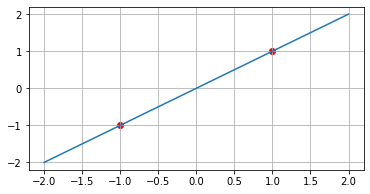

In [4]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.scatter([p[0] for p in pts], [p[1] for p in pts], color='r')
plt.grid()
plt.show()

In [5]:
pts = [(0, 0), (1, 1), (-1, 1)]
def g(x):
    return lagrange(x, *pts)

In [6]:
xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([f(x) for x in xs])

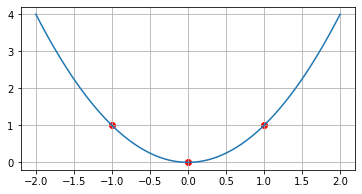

In [7]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.scatter([p[0] for p in pts], [p[1] for p in pts], color='r')
plt.grid()
plt.show()

In [8]:
pts = [(0, 0), (1, 1), (-1, -1), (2, 8)]
def h(x):
    return lagrange(x, *pts)

In [9]:
xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([f(x) for x in xs])

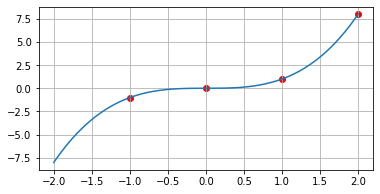

In [10]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.scatter([p[0] for p in pts], [p[1] for p in pts], color='r')
plt.grid()
plt.show()

In [11]:
import random

x = [2*random.random()-1 for _ in range(10)]
y = [random.random() for _ in range(10)]

pts = list(zip(x, y))

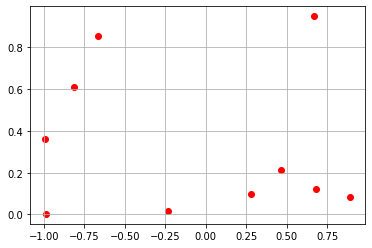

In [12]:
plt.scatter([p[0] for p in pts], [p[1] for p in pts], color='r')
plt.grid()
plt.show()

In [13]:
def h(x):
    return lagrange(x, *pts)

In [14]:
xs = np.arange(min(x)-0.01, max(x)+0.01, 0.01)
ys = np.array([h(x) for x in xs])

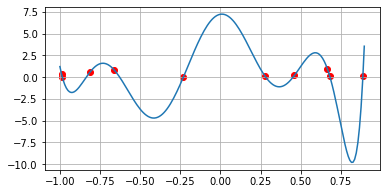

In [15]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.scatter([p[0] for p in pts], [p[1] for p in pts], color='r')
plt.grid()
plt.show()

# Lagrange를 이용한 Local Minimum 탐색
1. $f'(a)f'(b)<0$인 구간 $[a, b]$ 설정 및 $c=(a+b)/2$
2. 점 $a$, $b$, $c$를 지나는 Lagrange polynomial 함수인 $\hat f$를 찾음
3. 이 함수의 local minimum을 만드는 점 $\theta$에 대해 $f'(\theta)$를 계산
    - $f'(a)f'(\theta)<0$이면 $[a, \theta]$에 대해 반복, $f'(b)f'(\theta)<0$이면 $[\theta, b]$에 대해 반복
    - $f'(\theta)=0$이면 $\theta$가 $f$의 local minimum

## 코드 구현

In [16]:
class gss:
    
    def __init__(self, a, b, func, tol=1e-6):
        self.xl = a
        self.xu = b
        self.func = func
        self.tol = tol
        
    def solve(self):
        a_history = [self.xl]
        b_history = [self.xu]
        
        phi = (1+5**0.5)/2
        
        d = (phi-1)*(self.xu - self.xl)
        x1 = self.xl+d
        x2 = self.xu-d
        while True:
            # 허용범위 이내일 때
            fxl = self.func(self.xl)
            fxu = self.func(self.xu)
            if fxl < fxu:
                xopt = self.xl
            else:
                xopt = self.xu
            epsilon = (2 - phi) * abs((self.xu-self.xl)/xopt)
            if epsilon <= self.tol:
                self.minimum = (self.xl + self.xu) / 2
                self.history = [(a, b) for (a, b) in zip(a_history, b_history)]
                return self.minimum
            

            fx1 = self.func(x1)
            fx2 = self.func(x2)
            
            if fx1 < fx2:
                self.xl = x2
                x2 = x1
                d = (phi-1)*(self.xu - self.xl)
                x1 = self.xl+d
            else:
                self.xu = x1
                x1 = x2
                d = (phi-1)*(self.xu - self.xl)
                x2 = self.xu-d
            
            
            
            a_history.append(self.xl)
            b_history.append(self.xu)

In [17]:
def derivative(func, x):
    delta_x = 1e-4
    fx_plus_delta = func(x + delta_x)
    fx_minus_delta = func(x - delta_x)
    
    return (fx_plus_delta - fx_minus_delta) / (2 * delta_x)

class lagrange_search:
    
    def __init__(self, func, a, b, tol=1e-4):
        assert derivative(func, a) * derivative(func, b) < 0, "f'(a) * f'(b) must be less than 0"
        
        self.func = func
        self.a = a
        self.b = b
        self.tol = tol
        
    def solve(self):
        a_history = [self.a]
        b_history = [self.b]
        
        while True:
            pts = [(self.a, self.func(self.a)), (self.b, self.func(self.b)), ((self.a+self.b)/2, self.func((self.a+self.b)/2))]
            fhat = lambda x:lagrange(x, *pts)

            # 라그랑지 함수를 최소로 만드는 값은 golden section search로 해결
            theta = gss(a=self.a, b=self.b, func=fhat).solve()
            
            fprimea = derivative(self.func, self.a)
            fprimeb = derivative(self.func, self.b)
            fprimet = derivative(self.func, theta)
            
            if (abs(fprimet) <= self.tol) or (abs(self.func(theta)) <= self.tol):
                self.minimum = theta
                self.history = [(a, b) for (a, b) in zip(a_history, b_history)]
                return theta
            
            elif fprimea * fprimet < 0:
                self.b = theta
                
            else:
                self.a = theta
                
            a_history.append(self.a)
            b_history.append(self.b)

In [18]:
import math

def f(x):
    return math.sin(math.cos(math.exp(x)))

In [19]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(-2, 2+0.01, 0.01)
ys = np.array([f(x) for x in xs])

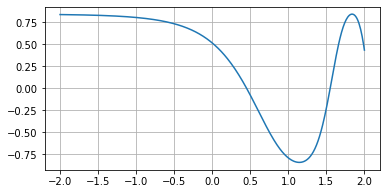

In [20]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [21]:
LS = lagrange_search(func=f, a=0, b=1.5)

In [22]:
LS.solve()

1.144730643441196

In [23]:
f(LS.minimum)

-0.8414709848063662

In [24]:
len(LS.history)

6

In [25]:
def g(x):
    return (x-1)*x*(x+1)

In [26]:
xs = np.arange(-1.5, 1.5+0.01, 0.01)
ys = np.array([g(x) for x in xs])

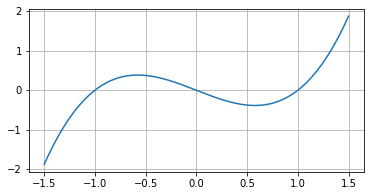

In [27]:
plt.figure(figsize=(6, 3))
plt.plot(xs, ys)
plt.grid()
plt.show()

In [28]:
LS = lagrange_search(func=g, a=-0.5, b=2)

In [29]:
LS.solve()

0.5773785954288917

In [30]:
g(LS.minimum)

-0.38490017806997207

In [31]:
len(LS.history)

25925